# Genetic Algorithm for Job-Shop Scheduling Problem (JSSP)

This notebook demonstrates the implementation of a Genetic Algorithm (GA) for solving a Job-Shop Scheduling Problem using the provided dataset, including graphical visualization with a Gantt chart.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "D:\\IIT\\Subjects\(4601)Computational Inteligence\\CW\\Implementation\\DataSet\\instances_with_bks.csv"
jssp_data = pd.read_csv(dataset_path)

# Select a specific instance from the dataset for demonstration
selected_instance = jssp_data.iloc[0]  # Choosing the first instance as an example

# Extract the number of jobs and machines from the instance
jobs = selected_instance['inst.jobs']
machines = selected_instance['inst.machines']

# Simulate a processing times matrix for the instance
# Generating random processing times as a placeholder
np.random.seed(42)  # Seed for reproducibility
processing_times = np.random.randint(1, 10, size=(jobs, machines))
processing_times


array([[7, 4, 8, 5, 7, 3, 7, 8, 5, 4],
       [8, 8, 3, 6, 5, 2, 8, 6, 2, 5],
       [1, 6, 9, 1, 3, 7, 4, 9, 3, 5],
       [3, 7, 5, 9, 7, 2, 4, 9, 2, 9],
       [5, 2, 4, 7, 8, 3, 1, 4, 2, 8],
       [4, 2, 6, 6, 4, 6, 2, 2, 4, 8],
       [7, 9, 8, 5, 2, 5, 8, 9, 9, 1],
       [9, 7, 9, 8, 1, 8, 8, 3, 1, 8],
       [3, 3, 1, 5, 7, 9, 7, 9, 8, 2],
       [1, 7, 7, 8, 5, 3, 8, 6, 3, 1]], dtype=int32)

### Step 1: Define Genetic Algorithm Components

In [3]:
def initialize_population(pop_size, jobs, machines):
    population = []
    for _ in range(pop_size):
        chromosome = []
        for job in range(jobs):
            for machine in range(machines):
                chromosome.append((job, machine))
        random.shuffle(chromosome)  # Shuffle to create a random sequence
        population.append(chromosome)
    return population

def calculate_schedule(chromosome, jobs, machines, processing_times):
    machine_times = [0] * machines
    job_times = [0] * jobs
    schedule = []

    for job, machine in chromosome:
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + processing_times[job][machine]
        machine_times[machine] = end_time
        job_times[job] = end_time
        schedule.append((job, machine, start_time, end_time))

    makespan = max(machine_times)
    return makespan, schedule

def fitness_function(chromosome, jobs, machines, processing_times):
    makespan, _ = calculate_schedule(chromosome, jobs, machines, processing_times)
    return 1 / makespan  # Fitness is inversely proportional to makespan

def crossover(parent1, parent2):
    split = len(parent1) // 2
    child = parent1[:split] + parent2[split:]
    return child

def mutate(chromosome):
    idx1, idx2 = random.sample(range(len(chromosome)), 2)
    chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome


### Step 2: Run the Genetic Algorithm

In [4]:
def genetic_algorithm(pop_size, generations, jobs, machines, processing_times):
    population = initialize_population(pop_size, jobs, machines)

    for gen in range(generations):
        population = sorted(population, key=lambda x: fitness_function(x, jobs, machines, processing_times), reverse=True)
        next_gen = population[:pop_size // 2]  # Select top half

        # Crossover and Mutation
        while len(next_gen) < pop_size:
            parent1, parent2 = random.sample(next_gen, 2)
            child = crossover(parent1, parent2)
            if random.random() < 0.1:  # Mutation probability
                child = mutate(child)
            next_gen.append(child)

        population = next_gen

    # Return the best solution
    best_chromosome = population[0]
    best_makespan, best_schedule = calculate_schedule(best_chromosome, jobs, machines, processing_times)
    return best_chromosome, best_makespan, best_schedule

# Run the Genetic Algorithm
best_solution, best_makespan, best_schedule = genetic_algorithm(
    pop_size=20,
    generations=50,
    jobs=jobs,
    machines=machines,
    processing_times=processing_times
)

print("Best Makespan:", best_makespan)
best_schedule


Best Makespan: 108


[(4, 0, 0, np.int32(5)),
 (0, 8, 0, np.int32(5)),
 (1, 4, 0, np.int32(5)),
 (7, 7, 0, np.int32(3)),
 (1, 8, np.int32(5), np.int32(7)),
 (0, 2, np.int32(5), np.int32(13)),
 (9, 5, 0, np.int32(3)),
 (8, 6, 0, np.int32(7)),
 (8, 2, np.int32(13), np.int32(14)),
 (5, 2, np.int32(14), np.int32(20)),
 (3, 6, np.int32(7), np.int32(11)),
 (9, 1, np.int32(3), np.int32(10)),
 (2, 0, np.int32(5), np.int32(6)),
 (6, 6, np.int32(11), np.int32(19)),
 (2, 7, np.int32(6), np.int32(15)),
 (4, 6, np.int32(19), np.int32(20)),
 (1, 3, np.int32(7), np.int32(13)),
 (6, 7, np.int32(19), np.int32(28)),
 (6, 5, np.int32(28), np.int32(33)),
 (2, 4, np.int32(15), np.int32(18)),
 (9, 3, np.int32(13), np.int32(21)),
 (9, 8, np.int32(21), np.int32(24)),
 (1, 0, np.int32(13), np.int32(21)),
 (2, 5, np.int32(33), np.int32(40)),
 (6, 8, np.int32(33), np.int32(42)),
 (4, 1, np.int32(20), np.int32(22)),
 (4, 9, np.int32(22), np.int32(30)),
 (3, 9, np.int32(30), np.int32(39)),
 (8, 4, np.int32(18), np.int32(25)),
 (8, 0, 

### Step 3: Visualize the Results with a Gantt Chart

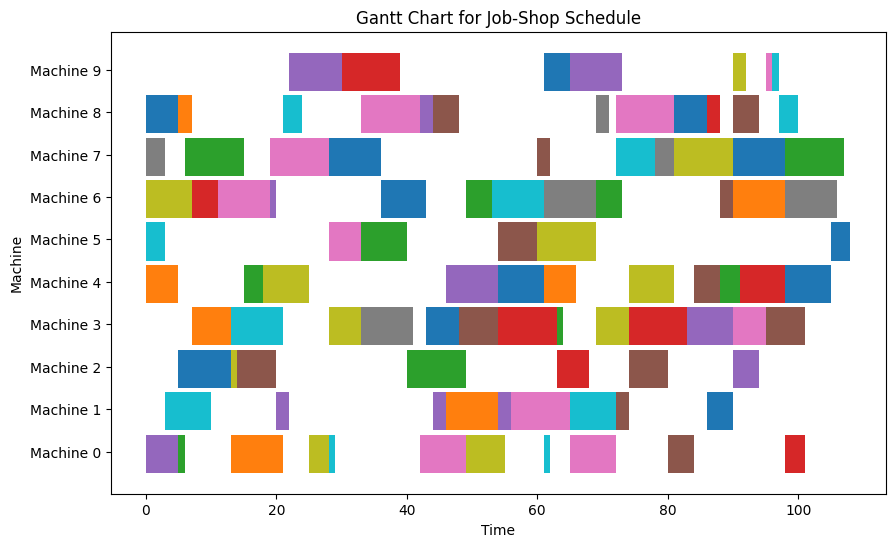

In [5]:
# Plot Gantt Chart
fig, ax = plt.subplots(figsize=(10, 6))

for job, machine, start, end in best_schedule:
    ax.broken_barh([(start, end - start)], (machine * 10, 9), facecolors=f'C{job}')

ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_yticks([i * 10 + 5 for i in range(machines)])
ax.set_yticklabels([f'Machine {i}' for i in range(machines)])
ax.set_title('Gantt Chart for Job-Shop Schedule')
plt.show()
